Import needed libs:

In [55]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal

plt.rcParams['figure.figsize'] = [16, 8] # Matplotlib config

Load .mat data and covert to proper python arrays:

In [56]:
matData = scipy.io.loadmat('Painless021.mat')

print(type(matData))
print(matData)

bp = matData.get('bp')[0] # not sure why you get arrays of arrays
ecg = matData.get('ecg')[0] # note: this is 3x array
ppg = matData.get('ppg')[0]

f_bp = matData.get('f_bp')[0]
f_ecg = matData.get('f_ecg')[0]
f_ppg = matData.get('f_ppg')[0]

<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Nov  3 22:29:57 2022', '__version__': '1.0', '__globals__': [], 'bp': array([[72.81, 72.11, 71.56, ..., 70.3 , 71.16, 72.64]]), 'ecg': array([[-0.00082984, -0.00081711, -0.00081434, ..., -0.00232391,
        -0.00233045, -0.00232606],
       [-0.00209742, -0.00207858, -0.00207047, ...,  0.00073009,
         0.00072508,  0.00072484],
       [-0.00160103, -0.00159402, -0.00158911, ...,  0.00271969,
         0.0027215 ,  0.00271502]]), 'f_bp': array([[100]], dtype=uint8), 'f_ecg': array([[2000]], dtype=uint16), 'f_ppg': array([[1000]], dtype=uint16), 'ppg': array([[2087000, 2087268, 2087604, ..., 2396945, 2396970, 2396976],
       [1694830, 1695004, 1695136, ..., 1893987, 1893996, 1894017]])}


## Plot **initial** data:


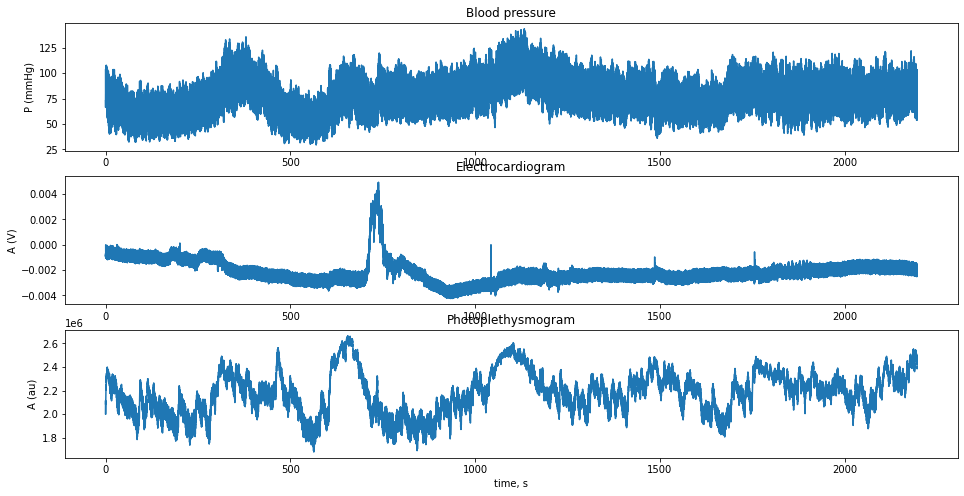

In [57]:
plt.figure()
plt.subplot(311)
time_bp = range(0, len(bp)) /f_bp
plt.plot(time_bp, bp)
plt.title('Blood pressure')
plt.ylabel('P (mmHg)')

plt.subplot(312)
time_ecg = range(0, len(ecg)) /f_ecg
plt.plot(time_ecg, ecg)
plt.title('Electrocardiogram')
plt.ylabel('A (V)')

plt.subplot(313)
time_ppg = range(0, len(ppg)) /f_ppg
plt.plot(time_ppg, ppg)
plt.title('Photoplethysmogram')
plt.ylabel('A (au)')
plt.xlabel('time, s')
plt.show()

Find features from unfiltered data *(not sure if needed)*. Finding SBP and DBP from peaks:

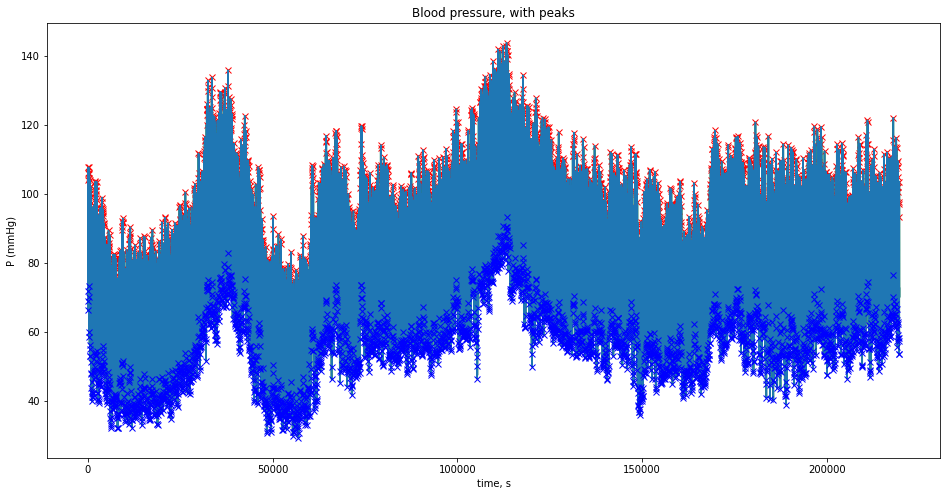

In [58]:
plt.figure()
locSBP, _ = find_peaks(bp, distance=50)
plt.plot(bp, "g")
plt.plot(locSBP, bp[locSBP], "rx")

locDBP, _ = find_peaks(-bp, distance=50)
plt.plot(bp)
plt.plot(locDBP, bp[locDBP], "bx")
plt.title('Blood pressure, with peaks')
plt.ylabel('P (mmHg)')
plt.xlabel('time, s')
plt.show()

Find **MBP**:

In [59]:
# The problem is that SBP and DBP arrays aren't the same length
print(len(locSBP))
print(len(locDBP))

3233
3232


In [60]:
sigLen = np.minimum(len(locSBP), len(locDBP)) #TODO: we really are just dropping data?
tempSBP = bp[locSBP]
SBP = tempSBP[:sigLen]
tempDBP= bp[locDBP][:sigLen]
DBP= tempDBP[:sigLen]
MBP = (2*DBP + SBP) / 3

Plot all 3 features on the same graph:

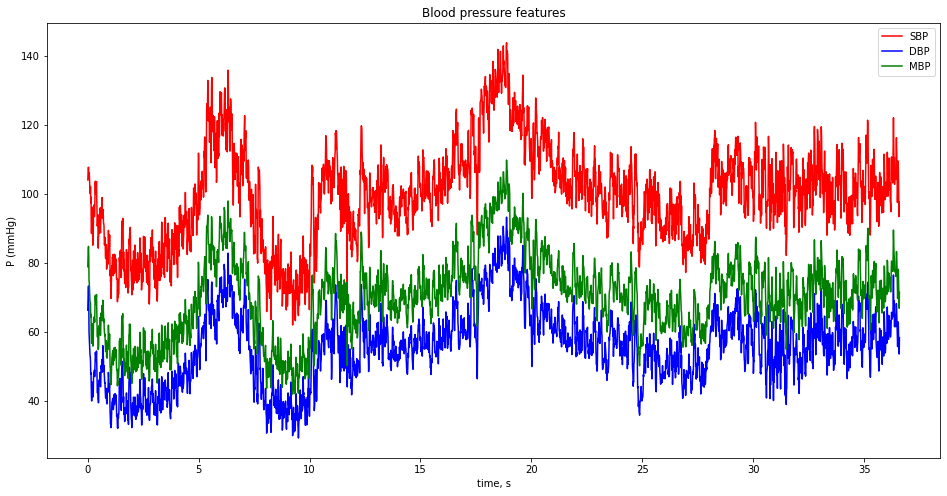

In [61]:
plt.figure()
t_SBP=locSBP[:sigLen] / f_bp;
plt.plot(t_SBP/60,SBP,'r', label='SBP')

t_DBP=locDBP[:sigLen] / f_bp;
plt.plot(t_DBP/60, DBP,'b', label='DBP')

t_MBP = range(0, sigLen) #TODO: check this
plt.plot(t_DBP/60, MBP,'g', label='MBP')
plt.legend()
plt.title('Blood pressure features')
plt.ylabel('P (mmHg)')
plt.xlabel('time, s')
plt.show()